<a href="https://colab.research.google.com/github/vyomer/NC/blob/main/confused_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files = files.upload()

Saving diabates.csv to diabates.csv


   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[Text(0, 0.5, 'no'), Text(0, 1.5, 'yes')]

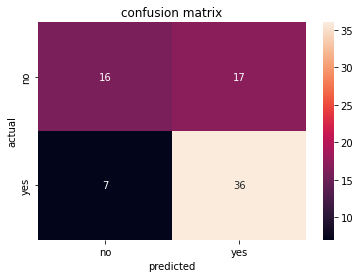

In [7]:
from sklearn.base import ClassifierMixin
import csv
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("diabates.csv")
print(df.head())
age = df['age']
heartattack = df['target']
age_train,age_test,heart_attack_train,heart_attack_test = train_test_split(age,heartattack,test_size = 0.25,random_state = 0)
X = np.reshape(age_train.ravel(),(len(age_train),1))
Y = np.reshape(heart_attack_train.ravel(),(len(heart_attack_train),1))
classifier = LogisticRegression(random_state = 0)
classifier.fit(X,Y)
X_test = np.reshape(age_test.ravel(),(len(age_test),1))
Y_test = np.reshape(heart_attack_test.ravel(),(len(heart_attack_test),1))
heart_attack_prediction = classifier.predict(X_test)
predicted_value = []
for i in heart_attack_prediction:
  if i == 0:
    predicted_value.append("no")
  else:
    predicted_value.append("yes")
actual_value = []
for i in Y_test.ravel():
  if i == 0:
    actual_value.append("no")
  else:
    actual_value.append("yes")
labels = ["no","yes"]
cm = confusion_matrix(actual_value,predicted_value)
ax = plt.subplot()
sns.heatmap(cm,annot = True,ax = ax)
ax.set_xlabel('predicted')
ax.set_ylabel('actual')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)